# Linear Regression

The idea of this project is to develop 3 different versions of the Linear Regression model.
1. Using the non-differential objective function (Differential Evolution)
2. Using the gradient descent (manual derivation)
3. Using the gradient descent (with autograd)

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt
import tqdm
import pandas as pd
import numpy as np
import jax.numpy as jnp
from jax import grad, jit
import optimization.de as de
plt.rcParams['figure.figsize'] = [10, 5]

## Load the dataset

In [178]:
data = pd.read_csv('../datasets/heart.csv')
data = data[['age', 'trestbps']]
data = data.rename(columns={"age":"age", "trestbps":"bps"})
data.head()

,age,bps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120


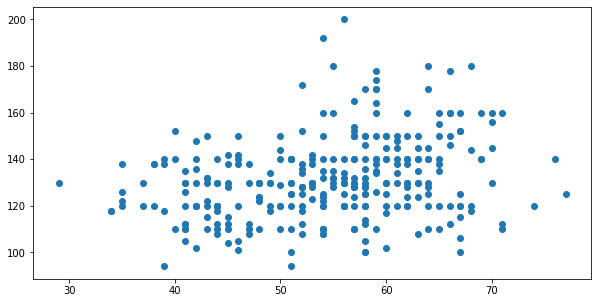

In [179]:
# divide the dataset
x = data[['age']]
y = data[['bps']]

# convert to numpy arrays
x = x.to_numpy()[:,0]
y = y.to_numpy()[:,0]

# plot the data
plt.plot(x, y, 'o')
plt.show()

In [180]:
def rmse(a, b):
    return np.sqrt(np.mean(np.power(a-b,2)))

## Differential Evolution

In [181]:
def f(w):
    return x*w[0]+w[1]

def cost(w):
    y_hat = f(w)
    return np.mean(np.power((y-y_hat), 2))

class LRDE:
    def fit(self, x, y):
        bounds = np.asarray([(-5.0, 5.0), (-5.0, 5.0)])
        solution = de.differential_evolution(cost, bounds, n_iter=300, debug=True)
        print(f'{solution[0]} ({solution[1]})')
        self.w = solution[0]
    
    def predict(self, x):
        return x*self.w[0]+self.w[1]
    
    def params(self):
        return self.w

In [182]:
lr = LRDE()
lr.fit(x,y)

100%|██████████| 300/300 [00:16<00:00, 18.21it/s]

[ 2.46916764 -5.        ] (594.4762977114497)


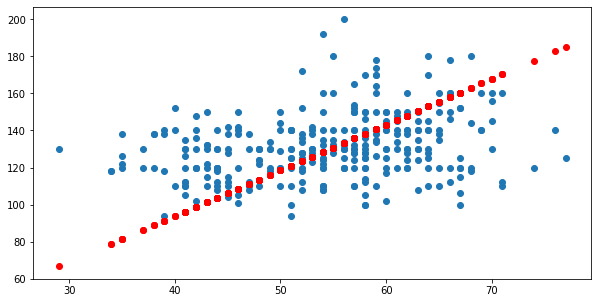

In [183]:
y_hat = f(lr.params())
# plot the data
plt.plot(x, y, 'o')
plt.plot(x, y_hat, 'ro')
plt.show()


In [184]:
cost = rmse(y,y_hat)
print(f'RMSE = {cost}')

RMSE = 24.38188462181399


## Gradient Descent (Manual)

In [185]:
class LR:
    def fit(self, X, Y, L=0.0001):
        self.m = 0.0
        self.c = 0.0
        for _ in tqdm.tqdm(range(1000)):
            Y_pred = self.m*X + self.c  # The current predicted value of Y
            D_m = np.average(-X * (Y - Y_pred))  # Derivative wrt m
            D_c = - np.average(Y - Y_pred)  # Derivative wrt c
            self.m = self.m - L * D_m  # Update m
            self.c = self.c - L * D_c  # Update c

    def predict(self, x):
        return x*self.m+self.c
    
    def params(self):
        return (self.m, self.c)

In [186]:
lr = LR()
lr.fit(x,y)
print(f'LR {lr.params()}')

100%|██████████| 1000/1000 [00:00<00:00, 20930.29it/s]

LR (2.364445837987069, 0.31866107099921415)


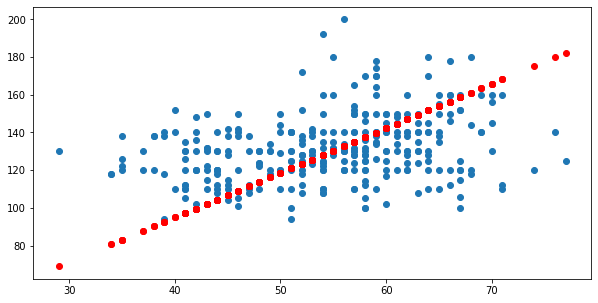

In [187]:
y_hat = f(lr.params())
# plot the data
plt.plot(x, y, 'o')
plt.plot(x, y_hat, 'ro')
plt.show()

In [188]:
cost = rmse(y,y_hat)
print(f'RMSE = {cost}')

RMSE = 23.750311085598696


### Gradient Descent (Autograd)

In [196]:
def J(X, m, b, y):
    y_hat = x * m + b
    return jnp.mean((y_hat-y)**2.0)

grad_X = jit(grad(J, argnums=1))
grad_b = jit(grad(J, argnums=2))

class LRAG:
    def fit(self, X, Y, L=0.0001):
        self.m = 0.0
        self.b = 0.0
        for _ in tqdm.tqdm(range(1000)):
            self.m = self.m - L * grad_X(X, self.m, self.b, Y)
            self.b = self.b - L * grad_b(X, self.m, self.b, Y)

    def predict(self, x):
        return x*self.m+self.b
    
    def params(self):
        return (self.m, self.b)

In [197]:
lr = LRAG()
lr.fit(x,y)
print(f'LR {lr.params()}')

100%|██████████| 1000/1000 [00:00<00:00, 4017.50it/s]

LR (DeviceArray(2.3599718, dtype=float32), DeviceArray(0.5686595, dtype=float32, weak_type=True))


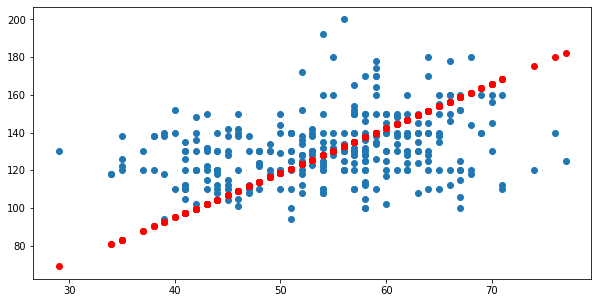

In [198]:
y_hat = f(lr.params())
# plot the data
plt.plot(x, y, 'o')
plt.plot(x, y_hat, 'ro')
plt.show()

In [199]:
cost = rmse(y,y_hat)
print(f'RMSE = {cost}')

RMSE = 23.721281051635742
